# Laboratorium 1

In [81]:
from math import floor, pi, exp, sqrt, cos
from matplotlib import pyplot as plt
from numpy.random import normal, uniform, seed, exponential
import numpy as np

seed(123)

a)

In [29]:
class RandomGenerator:
    def __init__(self, seed, a0=floor(exp(1)*10**9), a1=floor(pi*10**9), m=2**35):
        self.a0 = a0
        self.a1 = a1
        self.m = m
        self.next_number = seed
    
    def uniform(self):
        self.next_number = (self.a1*self.next_number + self.a0) % self.m
        return self.next_number/(self.m - 1)

In [44]:
rd = RandomGenerator(32)
numbers = [0]*100000
for i in range(len(numbers)):
    numbers[i] = rd.uniform()

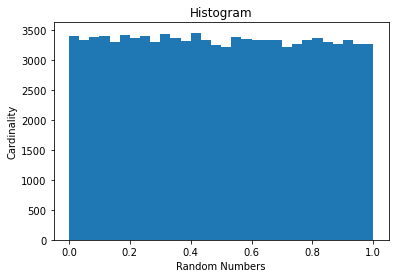

In [45]:
plt.hist(numbers, bins=30, range=[0, 1])
plt.ylabel('Cardinality')
plt.xlabel('Random Numbers')
plt.title('Histogram')
plt.show()
# widzimy w miarę jednostajny rozkład

b)

In [62]:
def normal_pdf(x):
    return 1/sqrt(2*pi) * exp(-1/2 * x**2)

def f(x):
    return (1 + cos(2*pi*x))/(1 + exp(-2*pi**2))

def random_b():
    y = uniform(0, 1)
    x = normal(0, 1)
    while y > f(x)/(2*normal_pdf(x)):
        y = uniform(0, 1)
        x = normal(0, 1)
    return x

In [76]:
for i in range(10):
    print("(Pseudo)random number ", i+1, ": ", random_b(), sep="")

(Pseudo)random number 1: 0.2802602800159519
(Pseudo)random number 2: -1.1285552625331772
(Pseudo)random number 3: -0.13372712129264994
(Pseudo)random number 4: -0.7850392533597353
(Pseudo)random number 5: -0.8877612343382443
(Pseudo)random number 6: 0.10426710894132228
(Pseudo)random number 7: 2.2954694476516364
(Pseudo)random number 8: 0.061431289544914246
(Pseudo)random number 9: -0.13287838154931245
(Pseudo)random number 10: -0.7141774153309354


c) Dla przykładu będziemy generowali zmienne z rozkładu Poissona o $\lambda$ równym 2.

In [83]:
# Sposób pierwszy - za pomocą procesu Poissona.
# Patrzymy ile zmiennych losowych z rozkładu Exp(2)
# zsumuje się do czegoś mniejszego od 1, z tym, że
# dodanie kolejnej zmiennej da sumę większą od 1.
# Liczba tych zmiennych da nam wartość zmiennej poissonowskiej z parameterm 2

def poisson1():
    x = exponential(2)
    poisson_val = 0
    while x <= 1:
        poisson_val += 1
        x += exponential(2)
    return poisson_val

d)

e)